In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [4]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MINIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MINIST_data/', download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle = True)

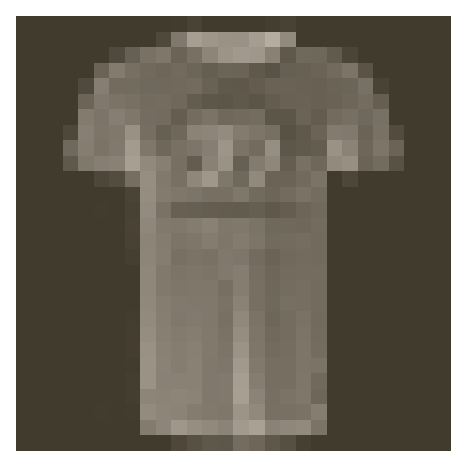

In [10]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

## Train a network

In [11]:
# Define the criterion and optimizer
model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [12]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs = 2)

Epoch: 1/2..  Training Loss: 1.658..  Test Loss: 0.958..  Test Accuracy: 0.642
Epoch: 1/2..  Training Loss: 1.015..  Test Loss: 0.715..  Test Accuracy: 0.729
Epoch: 1/2..  Training Loss: 0.848..  Test Loss: 0.667..  Test Accuracy: 0.748
Epoch: 1/2..  Training Loss: 0.799..  Test Loss: 0.645..  Test Accuracy: 0.751
Epoch: 1/2..  Training Loss: 0.739..  Test Loss: 0.643..  Test Accuracy: 0.748
Epoch: 1/2..  Training Loss: 0.719..  Test Loss: 0.605..  Test Accuracy: 0.775
Epoch: 1/2..  Training Loss: 0.673..  Test Loss: 0.578..  Test Accuracy: 0.773
Epoch: 1/2..  Training Loss: 0.673..  Test Loss: 0.557..  Test Accuracy: 0.793
Epoch: 1/2..  Training Loss: 0.681..  Test Loss: 0.569..  Test Accuracy: 0.791
Epoch: 1/2..  Training Loss: 0.613..  Test Loss: 0.566..  Test Accuracy: 0.789
Epoch: 1/2..  Training Loss: 0.625..  Test Loss: 0.548..  Test Accuracy: 0.804
Epoch: 1/2..  Training Loss: 0.632..  Test Loss: 0.550..  Test Accuracy: 0.801
Epoch: 1/2..  Training Loss: 0.640..  Test Loss: 0.5

In [13]:
# Saving : the parameters for pytorch networks are stored in a model's state_dict 
print('model ', model, '\n')
print('The estate dict keys: \n', model.state_dict().keys())

model  Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
) 

The estate dict keys: 
 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [14]:
# save the state dict with torch.save in a file checkpoint.pth
torch.save(model.state_dict(), 'checkpoint.pth')
# load the model
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [15]:
model.load_state_dict(state_dict)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [17]:
# Works only if has the same architecture
# example
model = fc_model.Network(784, 10, [400, 200, 100])
# throw an error, because the tensor sizes are wrong
model.load_state_dict(state_dict)

In [23]:
# rebuild the model with information about model architecture
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}
torch.save(checkpoint, 'checkpoint.pth')

In [24]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    return model

model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)
